In [ ]:
%tensorflow_version 2.x

In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model, Sequential
from keras import regularizers
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


2.2.0


In [4]:
from platform import python_version

print(python_version())

3.6.9


In [5]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
def save_model(m,filename):
    model_json = m.to_json()
    with open("/gdrive/My Drive/colab_data/"+filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights("/gdrive/My Drive/colab_data/"+filename+".h5")
    print("Saved model to disk")

In [ ]:
def load_model_weights(filename, model):
    model.load_weights("/gdrive/My Drive/colab_data/"+filename+".h5")
    print("Loaded weights from disk")
    return model

In [ ]:
# this is the size of our encoded representations
encoding_dim = 32
input_size = 784

In [9]:
ae = Sequential()

# Encoder Layers
ae.add(Dense(encoding_dim, input_shape=(input_size,), activation='relu'))

# Decoder Layers
ae.add(Dense(input_size, activation='sigmoid'))

ae.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ae.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [14]:
#ae = load_model_weights('ae', ae)

Loaded weights from disk


In [14]:
history = ae.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1026 - val_loss: 0.1008
Epoch 2/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1022 - val_loss: 0.1005
Epoch 3/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1019 - val_loss: 0.1001
Epoch 4/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1016 - val_loss: 0.0998
Epoch 5/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1013 - val_loss: 0.0995
Epoch 6/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1010 - val_loss: 0.0993
Epoch 7/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1007 - val_loss: 0.0990
Epoch 8/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1005 - val_loss: 0.0988
Epoch 9/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.1002 - val_loss: 0.0985
Epoch

In [15]:
save_model(ae,'ae')

Saved model to disk


In [16]:
ae.layers[0].get_weights()[0][780,:]

array([ 0.00194339,  0.0846682 , -0.07817593, -0.07707309,  0.07548209,
       -0.0123865 ,  0.01642301, -0.05506727, -0.05366016,  0.06817447,
       -0.02695107,  0.01816065,  0.07854893,  0.02507304,  0.0729438 ,
        0.04124113,  0.02289303,  0.05009174, -0.05958956, -0.04889537,
       -0.03541072, -0.02223837,  0.07349224,  0.00325254,  0.00612249,
        0.0630969 , -0.04278798, -0.0028948 ,  0.07713469,  0.08180521,
       -0.05644736, -0.03953504], dtype=float32)

In [17]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae.layers[0]
encoder = Model(input_img, encoder_layer1(input_img))

encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


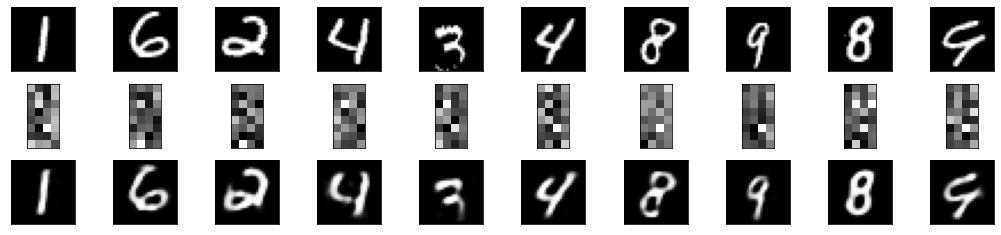

In [18]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
ae1 = Sequential()

# Encoder Layers
ae1.add(Dense(encoding_dim, input_shape=(input_size,), activation='relu',
                activity_regularizer=regularizers.l1(10e-6)))

# Decoder Layers
ae1.add(Dense(input_size, activation='sigmoid'))

ae1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

In [23]:
#ae1 = load_model_weights('ae1', ae1)

Loaded weights from disk


In [24]:
ae1.fit(x_train, x_train,
                epochs=150,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.4958 - val_loss: 0.3276
Epoch 2/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.3185 - val_loss: 0.3114
Epoch 3/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.3078 - val_loss: 0.3043
Epoch 4/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.3020 - val_loss: 0.2997
Epoch 5/150
60000/60000 [==============================] - 1s 13us/step - loss: 0.2980 - val_loss: 0.2961
Epoch 6/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.2948 - val_loss: 0.2933
Epoch 7/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.2922 - val_loss: 0.2909
Epoch 8/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.2899 - val_loss: 0.2888
Epoch 9/150
60000/60000 [==============================] - 1s 14us/step - loss: 0.2879 - val_loss: 0.2

In [25]:
save_model(ae1,'ae1')

Saved model to disk


In [26]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae1.layers[0]
encoder1 = Model(input_img, encoder_layer1(input_img))

encoder1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


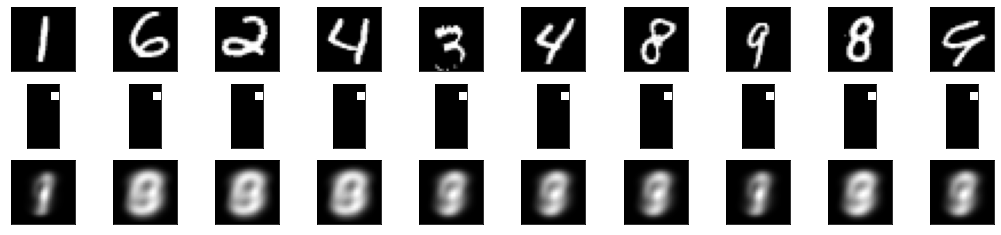

In [27]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder1.predict(x_test)
decoded_imgs = ae1.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
ae2 = Sequential()

# Encoder Layers
ae2.add(Dense(4 * encoding_dim, input_shape=(784,), activation='relu'))
ae2.add(Dense(2 * encoding_dim, activation='relu'))
ae2.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
ae2.add(Dense(2 * encoding_dim, activation='relu'))
ae2.add(Dense(4 * encoding_dim, activation='relu'))
ae2.add(Dense(784, activation='sigmoid'))

ae2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [ ]:
ae2.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
ae2 = load_model_weights('ae2', ae2)

Loaded weights from disk


In [31]:
ae2.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.0895 - val_loss: 0.0883
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0886 - val_loss: 0.0880
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0886 - val_loss: 0.0879
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0886 - val_loss: 0.0878
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0885 - val_loss: 0.0878
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0884 - val_loss: 0.0878
Epoch 7/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0883 - val_loss: 0.0879
Epoch 8/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0883 - val_loss: 0.0877
Epoch 9/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0882 - val_loss: 0.0877
Epoch

In [32]:
save_model(ae2,'ae2')

Saved model to disk


In [33]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae2.layers[0]
encoder_layer2 = ae2.layers[1]
encoder_layer3 = ae2.layers[2]
encoder2 = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


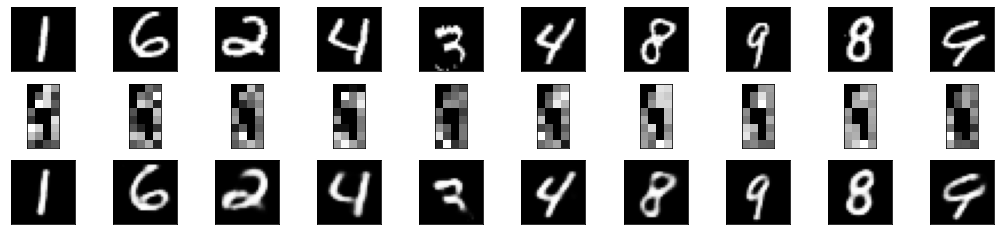

In [34]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder2.predict(x_test)
decoded_imgs = ae2.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train_r = x_train.reshape((len(x_train), 28, 28, 1))
x_test_r = x_test.reshape((len(x_test), 28, 28, 1))

In [36]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_r.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)          

In [38]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_1').output)
encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0   

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
autoencoder = load_model_weights('ae3',autoencoder)

Loaded weights from disk


In [43]:
autoencoder.fit(x_train_r, x_train_r,
                epochs=10,
                batch_size=128,
                validation_data=(x_test_r, x_test_r))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0917 - val_loss: 0.0901
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0909 - val_loss: 0.0894
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0902 - val_loss: 0.0888
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0897 - val_loss: 0.0887
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0892 - val_loss: 0.0881
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0888 - val_loss: 0.0874
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0884 - val_loss: 0.0870
Epoch 8/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0880 - val_loss: 0.0874
Epoch 9/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0877 - val_loss: 0.0866
Epoch

In [44]:
save_model(autoencoder, 'ae3')

Saved model to disk


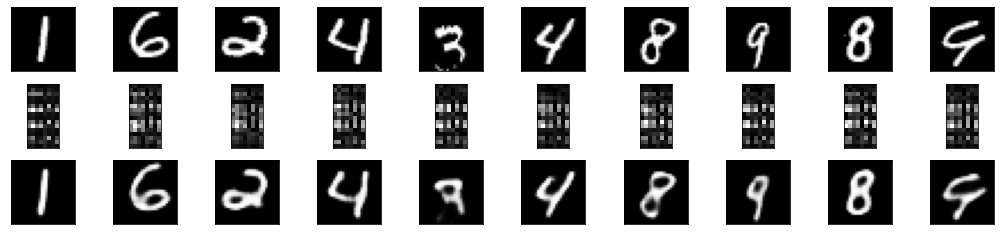

In [45]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test_r)
decoded_imgs = autoencoder.predict(x_test_r)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()